# Question 4

- The energy of the speech signal is calculated as the square of the amplitude of the signal in the wondow.
- The zero-crossing rate (ZCR) of a signal is defined as the number of times the signal crosses zero. It is calculated as the number of times the sign of the signal changes, divided by 2.
- The short-term energy and ZCR of the different segments of the audio are plotted against time.
- It is observed that the unvoiced regions have higher ZCR but lower energy while the opposite is true for the voiced regions.

In [2]:
import numpy as np
# import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa

In [3]:
def shortTimeEnergy(signal, window_size, shift):
    energy = []

    for start in range(0, len(signal) - window_size + 1, shift):
        frame = signal[start:start + window_size]
        frameEnergy = np.sum(frame ** 2)
        energy.append(frameEnergy)

    return np.array(energy)

def zeroCrossingRate(signal, window_size, shift):
    zcr = []

    for start in range(0, len(signal) - window_size + 1, shift):
        frame = signal[start:start + window_size]
        zero_crossings = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
        zcr.append(zero_crossings)

    return np.array(zcr)

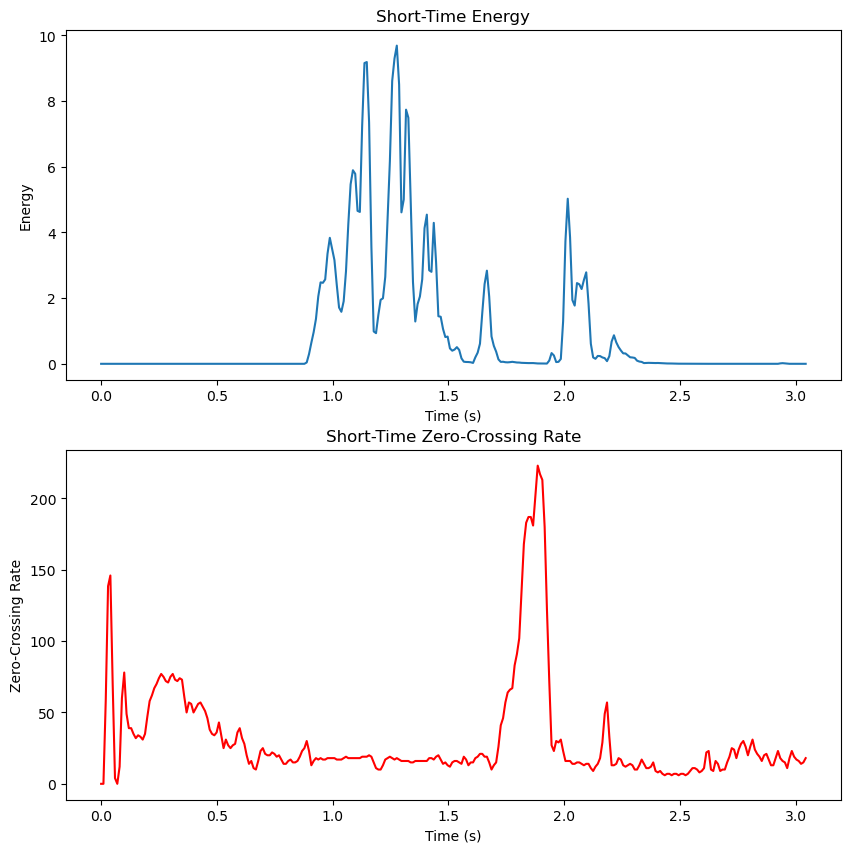

In [4]:
signal, fs = librosa.load("speech.wav")

windowSize = int(0.02 * fs)
shiftSize = int(0.01 * fs)

ste = shortTimeEnergy(signal, windowSize, shiftSize)
zcr = zeroCrossingRate(signal, windowSize, shiftSize)

time = np.arange(0, len(ste)) * shiftSize / fs

# short-time energy
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(time, ste)
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Short-Time Energy')

# zero-crossing rate
plt.subplot(2, 1, 2)
plt.plot(time, zcr, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Zero-Crossing Rate')
plt.title('Short-Time Zero-Crossing Rate')

plt.show()

<h3>Part-2</h3>

- The speech signal has been manually split into different phoneme segments based on their timestamp and stored in a dictionary. 
- Thus, we are able to extract the average short-term energy and ZCR for each phoneme and compare them

In [5]:
phoneme_timestamps = [
    ("m", 0.901, 1.055),
    ("y", 1.056, 1.232),
    ("n", 1.233, 1.291),
    ("a", 1.292, 1.425),
    ("m", 1.426, 1.507),
    ("e", 1.508, 1.631),
    ("i", 1.632, 1.717),
    ("s", 1.718, 1.812),
    ("s", 1.813, 1.950),
    ("r", 1.951, 2.015),
    ("ee", 2.016, 2.158),
    ("j", 2.159, 2.214),
    ("a", 2.215, 2.324),
]

averages = []
for phoneme, start_time, end_time in phoneme_timestamps:
    start_index = int(np.floor(start_time * fs / shiftSize))
    end_index = int(np.ceil(end_time * fs / shiftSize))
    phoneme_ste = ste[start_index:end_index]
    phoneme_zcr = zcr[start_index:end_index]

    avg_ste = np.mean(phoneme_ste)
    avg_zcr = np.mean(phoneme_zcr)

    averages.append({"phoneme": phoneme, "average_ste": avg_ste, "average_zcr": avg_zcr})
    
for avg in averages:
    print(f"Phoneme: {avg['phoneme']}")
    print(f"  Average STE: {avg['average_ste']}")
    print(f"  Average ZCR: {avg['average_zcr']}")

Phoneme: m
  Average STE: 2.143733501434326
  Average ZCR: 17.5
Phoneme: y
  Average STE: 4.311679840087891
  Average ZCR: 16.68421052631579
Phoneme: n
  Average STE: 7.043399810791016
  Average ZCR: 17.714285714285715
Phoneme: a
  Average STE: 4.289807319641113
  Average ZCR: 16.071428571428573
Phoneme: m
  Average STE: 1.9098984003067017
  Average ZCR: 16.3
Phoneme: e
  Average STE: 0.24497868120670319
  Average ZCR: 15.692307692307692
Phoneme: i
  Average STE: 1.1700468063354492
  Average ZCR: 17.8
Phoneme: s
  Average STE: 0.0587090365588665
  Average ZCR: 64.3
Phoneme: s
  Average STE: 0.045371342450380325
  Average ZCR: 159.93333333333334
Phoneme: r
  Average STE: 0.8392325639724731
  Average ZCR: 25.571428571428573
Phoneme: ee
  Average STE: 1.8913356065750122
  Average ZCR: 13.933333333333334
Phoneme: j
  Average STE: 0.26548609137535095
  Average ZCR: 33.166666666666664
Phoneme: a
  Average STE: 0.36372509598731995
  Average ZCR: 13.363636363636363


In [7]:
vowels = ['a', 'e', 'i', 'ee'] 
vowel_features = [avg for avg in averages if avg['phoneme'] in vowels]

for avg in vowel_features:
    print(f"Phoneme: {avg['phoneme']}")
    print(f"  Average STE: {avg['average_ste']}")
    print(f"  Average ZCR: {avg['average_zcr']}")

Phoneme: a
  Average STE: 4.289807319641113
  Average ZCR: 16.071428571428573
Phoneme: e
  Average STE: 0.24497868120670319
  Average ZCR: 15.692307692307692
Phoneme: i
  Average STE: 1.1700468063354492
  Average ZCR: 17.8
Phoneme: ee
  Average STE: 1.8913356065750122
  Average ZCR: 13.933333333333334
Phoneme: a
  Average STE: 0.36372509598731995
  Average ZCR: 13.363636363636363


- We notice that the unvoiced regions (eg: 's') have a higher ZCR and a lower short-term energy (STE). This is because unvoiced regions are almost noise like signals and thus they have high frequwncy and will cross the zero-origin more. Further, they have shorter amplitudes than voiced regions (because no vibrations) and thus will have lower energy.
- In general, vowels have higher STE than consonants do.
- Amongst the vowels, we notice that there is a difference between the STE values of the 'a'. This might be because the first 'a' is prnounced more prominently then the second one.
- We also notice that all the vowels have around the same ZCR range of values, and they are not very high (when comapred to 's'), indicating that they are voiced.
- Further, the higher the ZCR of the vowel, the higher the frequency characteristics of the vowel. The higher the STE of a vowel, the more louder/ larger the amplitude. Any discrepencies in the values could be because of the manual segmentation of the phonemes. 